In [7]:
from collections import defaultdict
import csv

def parse_results(directory):
    results = defaultdict(list)
    with open("/home/stephanie/ray-fork/results/{}/lease-reconstructions.csv".format(directory), 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            lease = float(row['lease'])
            num_reconstructions = float(row['num_reconstructions'])
            num_submitted = float(row['num_submitted'])
            results[lease].append(num_reconstructions / num_submitted * 100)
    return results

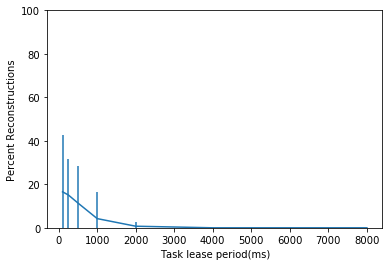

In [25]:
import matplotlib.pyplot as plt
import numpy as np

DIRECTORY = "results-lease"
results = parse_results(DIRECTORY)
lease_times = sorted(results.keys())
means = []
yerr = []
for x in lease_times:
    means.append(np.mean(results[x]))
    yerr.append(np.std(results[x]) * 2)

plt.errorbar(lease_times, means, yerr=yerr)
plt.xlabel("Task lease period(ms)")
plt.ylabel("Percent Reconstructions")
plt.ylim(0, 100)

# plt.show()
plt.savefig("/home/stephanie/ray-fork/results/{}/lease-reconstructions.pdf".format(DIRECTORY))